In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv("/student_data.csv")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
X=df.iloc[:,:-3]
y=df[["G1","G2","G3"]].mean(axis=1)

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [ ]:
y.head()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
dtype: float64

<ipython-input-9-4c5be9890c4d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


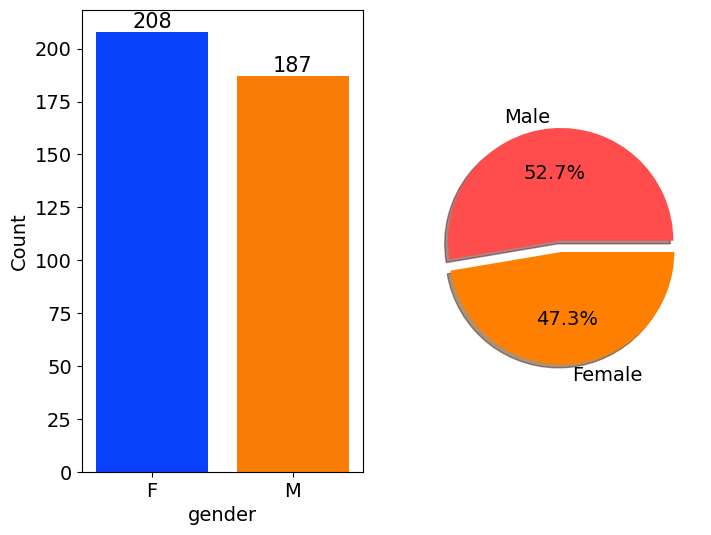

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,6))



sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)


ax[0].set_xlabel('gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)


plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})


plt.show()

<ipython-input-10-fdd75e449173>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['address'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


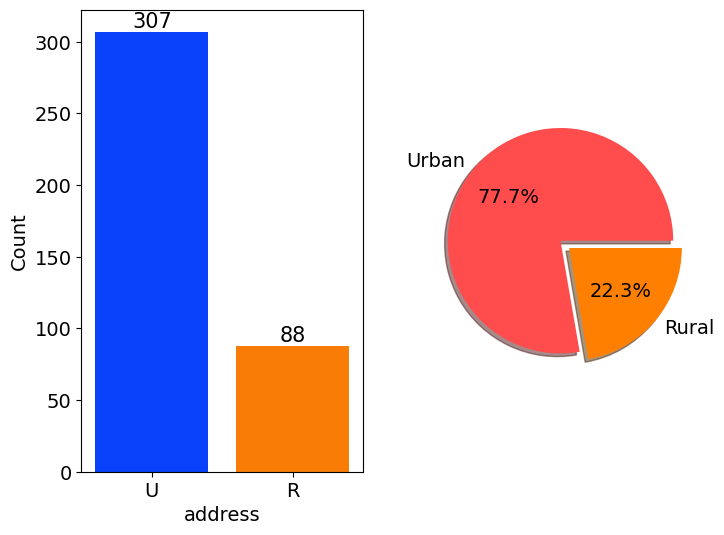

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,6))



sns.countplot(x=df['address'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)


ax[0].set_xlabel('address', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)


plt.pie(x=df['address'].value_counts(),labels=['Urban','Rural'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})


plt.show()

<ipython-input-11-ccb46ca008d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fjob'], data=df, palette=colors, ax=ax[0], saturation=0.95)


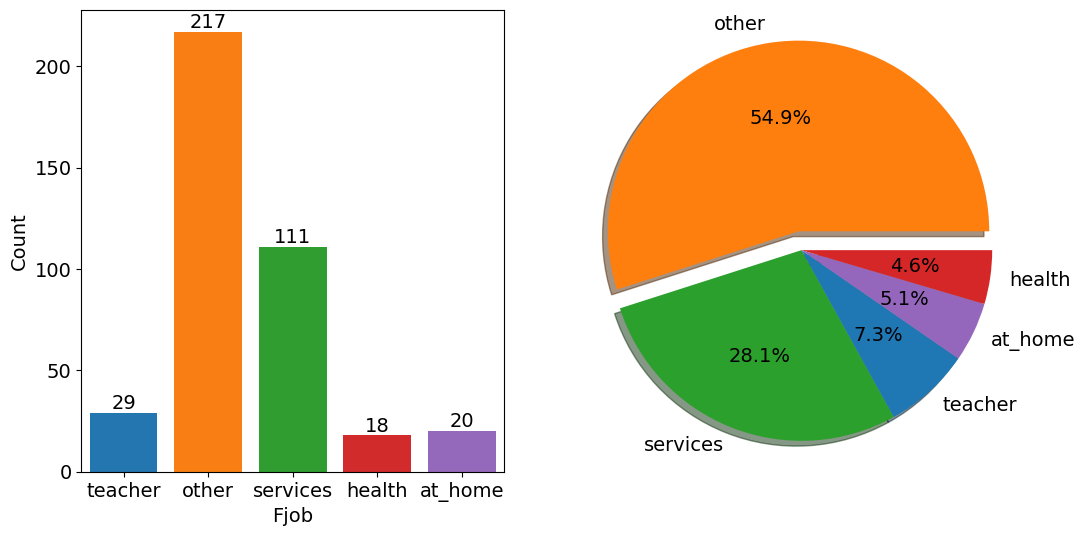

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']



f, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(x=df['Fjob'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)


ax[0].set_xlabel('Fjob', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)


color_dict = dict(zip(df['Fjob'].unique(), colors))


pie_colors = [color_dict[race] for race in df['Fjob'].value_counts().index]


plt.pie(x=df['Fjob'].value_counts(), labels=df['Fjob'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})


plt.axis('equal')


plt.show()

<ipython-input-12-e38ef2583a47>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Mjob'], data=df, palette=colors, ax=ax[0], saturation=0.95)


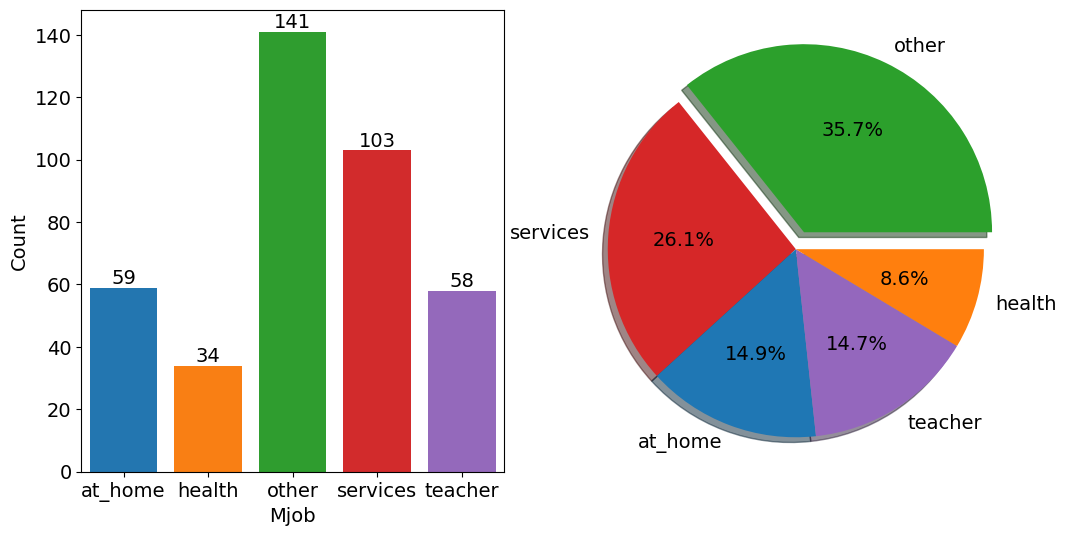

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']



f, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(x=df['Mjob'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)


ax[0].set_xlabel('Mjob', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)


color_dict = dict(zip(df['Mjob'].unique(), colors))


pie_colors = [color_dict[race] for race in df['Mjob'].value_counts().index]


plt.pie(x=df['Mjob'].value_counts(), labels=df['Mjob'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})


plt.axis('equal')


plt.show()

(-1.25, 1.25, -1.25, 1.25)

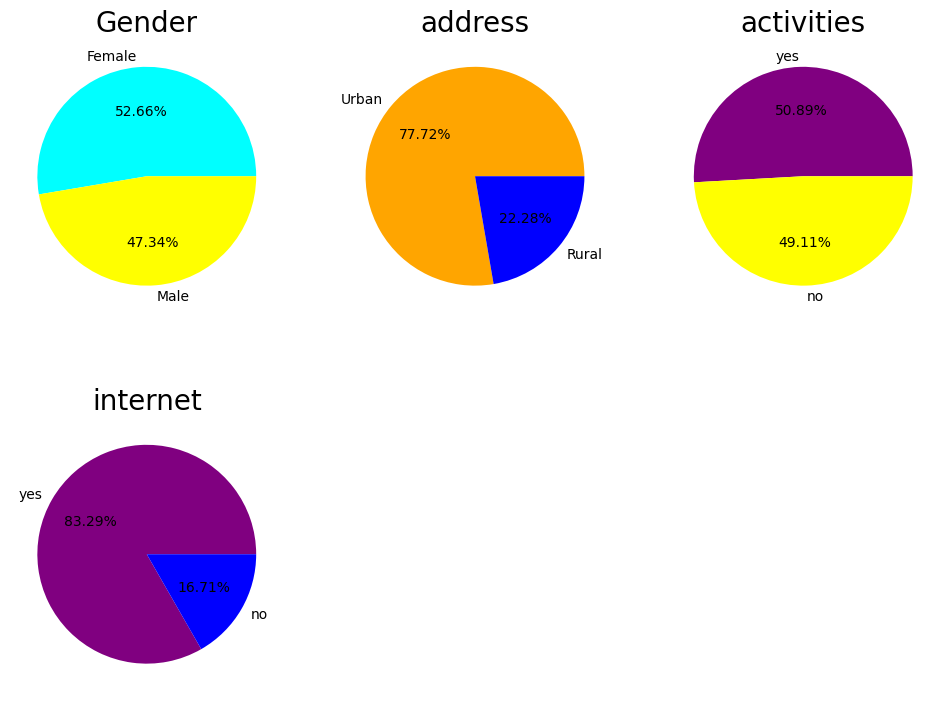

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)


plt.subplot(2, 3, 1)
size = df['sex'].value_counts()
labels = 'Female', 'Male'
color = ['cyan','yellow']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['address'].value_counts()
labels = 'Urban', 'Rural'
color = ['orange', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('address', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['activities'].value_counts()
labels = 'yes', 'no'
color = ['purple', 'yellow']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('activities', fontsize=20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['internet'].value_counts()
labels = 'yes', 'no'
color = ['purple', 'blue']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('internet', fontsize=20)
plt.axis('off')

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'  # If you want to keep any remaining columns
)

X = preprocessor.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)
X_train.shape, X_test.shape

((197, 56), (198, 56))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model=XGBRegressor()
model.fit(X_train, y_train)  # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae = mean_absolute_error(y_train, y_train_pred)
model_train_mse = mean_squared_error(y_train, y_train_pred)
model_train_rmse = model_train_mse**0.5
model_train_r2 = r2_score(y_train, y_train_pred)

model_test_mae = mean_absolute_error(y_test, y_test_pred)
model_test_mse = mean_squared_error(y_test, y_test_pred)
model_test_rmse = model_test_mse**0.5
model_test_r2 = r2_score(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}",format(model_train_rmse))
print("- Mean Squared Error: {:.4f}",format(model_train_mse))
print("- Mean Absolute Error: {:.4f}",format(model_train_mae))
print("- R2 Score: {:.4f}",format(model_train_r2))

print('----------------------------------')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}",format(model_test_rmse))
print("- Mean Squared Error: {:.4f}",format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}",format(model_test_mae))
print("- R2 Score: {:.4f}",format(model_test_r2))

# r2_list.append(model_test_r2)

print('='*35)
print('\n')

Model performance for Training set
- Root Mean Squared Error: {:.4f} 0.0012083573365491336
- Mean Squared Error: {:.4f} 1.460127452792116e-06
- Mean Absolute Error: {:.4f} 0.0007334731758749682
- R2 Score: {:.4f} 0.9999998858420851
----------------------------------
Model performance for Test set
- Root Mean Squared Error: {:.4f} 3.4190747932689716
- Mean Squared Error: {:.4f} 3.4190747932689716
- Mean Absolute Error: {:.4f} 2.7866014270268704
- R2 Score: {:.4f} 0.1875553317693862




In [ ]:
y_pred = model.predict(X_test)

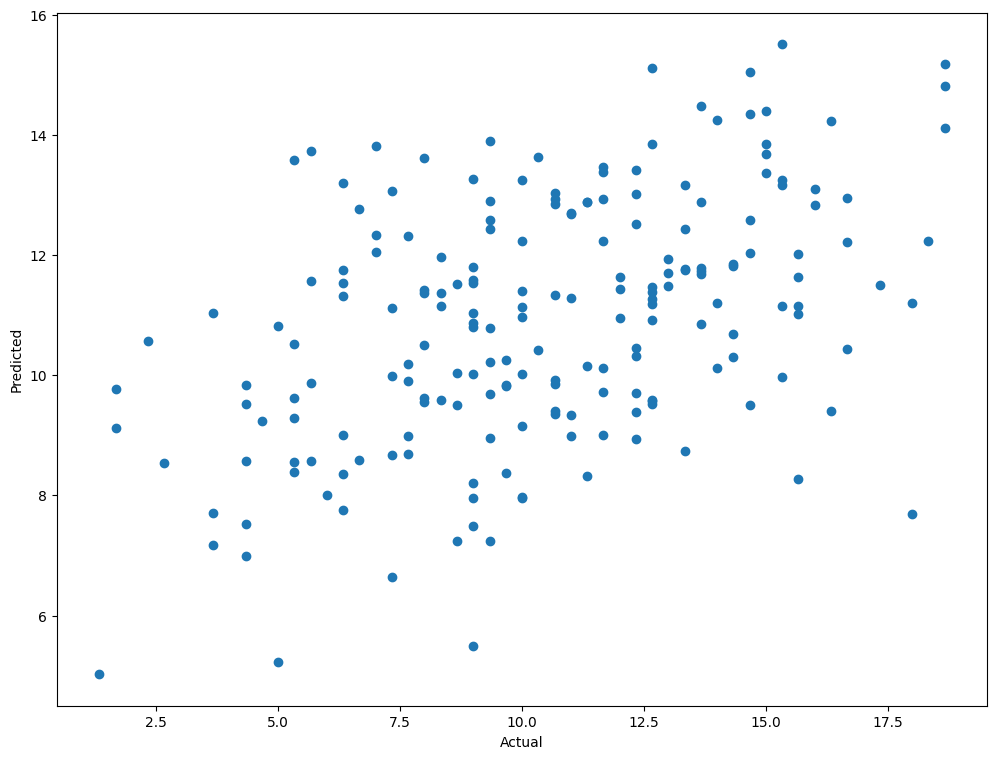

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
78,8.666667,7.243054,1.423612
371,12.666667,11.385822,1.280844
248,4.333333,9.515102,-5.181769
55,9.000000,10.808237,-1.808237
390,9.000000,10.873405,-1.873405
...,...,...,...
298,13.666667,12.889408,0.777259
183,8.666667,11.524190,-2.857523
220,6.000000,8.005939,-2.005939
312,11.666667,9.728778,1.937889


In [ ]:
!pip install pycaret

In [ ]:
# df["avg"]=df[["G1","G2","G3"]].mean(axis=1)
y=df.iloc[:,-3:]
df=df.iloc[:,:-3]
df["avg"]=y.mean(axis=1)

In [ ]:
df["avg"]=df["avg"].div(20)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0.283333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0.266667
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0.416667
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,0.733333
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0.433333


In [ ]:
from pycaret.regression import *
a=setup(df,target="avg")

,Description,Value
0,Session id,374
1,Target,avg
2,Target type,Regression
3,Original data shape,"(395, 31)"
4,Transformed data shape,"(395, 44)"
5,Transformed train set shape,"(276, 44)"
6,Transformed test set shape,"(119, 44)"
7,Numeric features,13
8,Categorical features,17
9,Preprocess,True


In [ ]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1231,0.0260,0.1594,0.1378,0.1064,0.3338,0.5910
gbr,Gradient Boosting Regressor,0.1265,0.0269,0.1620,0.1115,0.1080,0.3344,0.4460
ada,AdaBoost Regressor,0.1320,0.0285,0.1662,0.0733,0.1107,0.3567,0.3210
br,Bayesian Ridge,0.1332,0.0281,0.1663,0.0691,0.1115,0.3652,0.5420
omp,Orthogonal Matching Pursuit,0.1338,0.0285,0.1673,0.0565,0.1121,0.3660,0.3980
lightgbm,Light Gradient Boosting Machine,0.1332,0.0289,0.1683,0.0362,0.1115,0.3412,0.4570
xgboost,Extreme Gradient Boosting,0.1364,0.0302,0.1713,0.0208,0.1141,0.3555,0.2610
ridge,Ridge Regression,0.1357,0.0294,0.1701,0.0073,0.1140,0.3609,0.3880
lr,Linear Regression,0.1366,0.0296,0.1708,-0.0028,0.1145,0.3624,0.8040
knn,K Neighbors Regressor,0.1360,0.0313,0.1752,-0.0339,0.1169,0.3722,0.2130


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
best=tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1526,0.0352,0.1876,-0.0115,0.1223,0.3844
1,0.1022,0.0175,0.1321,-0.1273,0.0933,0.3125
2,0.1484,0.0355,0.1885,0.1447,0.1235,0.3910
3,0.1170,0.0211,0.1453,0.0965,0.0988,0.3052
4,0.1398,0.0338,0.1839,0.0077,0.1141,0.2574
5,0.1310,0.0268,0.1638,0.0713,0.1071,0.3084
6,0.1160,0.0198,0.1406,0.2796,0.0965,0.3071
7,0.1512,0.0404,0.2009,-0.2635,0.1442,0.6787
8,0.1246,0.0244,0.1563,0.2084,0.1073,0.3785


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
X=df.iloc[:,:-2]
y=df["avg"]
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'  # If you want to keep any remaining columns
)

X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)
X_train.shape, X_test.shape

((197, 55), (198, 55))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters
hyperparameters = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'criterion': 'squared_error',
    'max_depth': None,
    'max_features': 1.0,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': 6358,
    'verbose': 0,
    'warm_start': False
}

random_forest_regressor = RandomForestRegressor(**hyperparameters)

random_forest_regressor.fit(X_train, y_train)

y_pred = random_forest_regressor.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, R^2 Score: {r2_rf}")

Random Forest Regressor - MAE: 0.13803198653198653, MSE: 0.0296392219416386, R^2 Score: 0.17604521420961317


Mean Squared Error: 0.0296392219416386


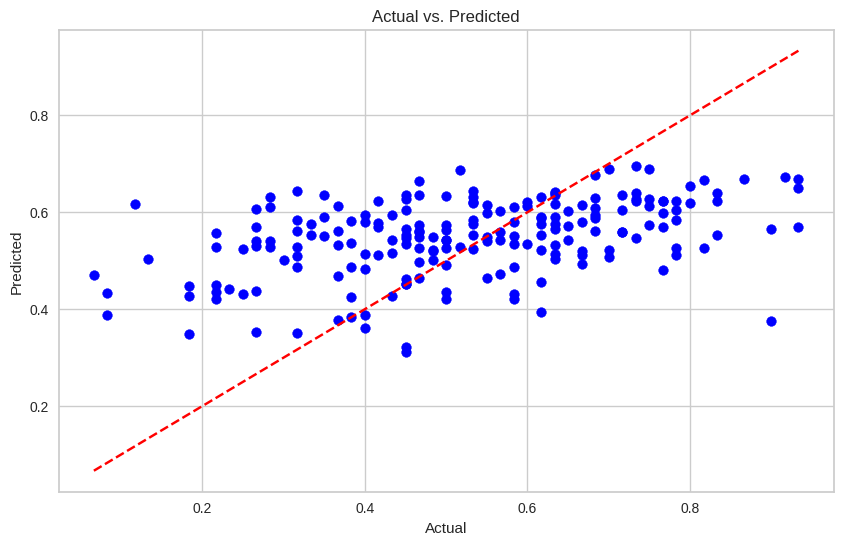

In [ ]:
y_pred = random_forest_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

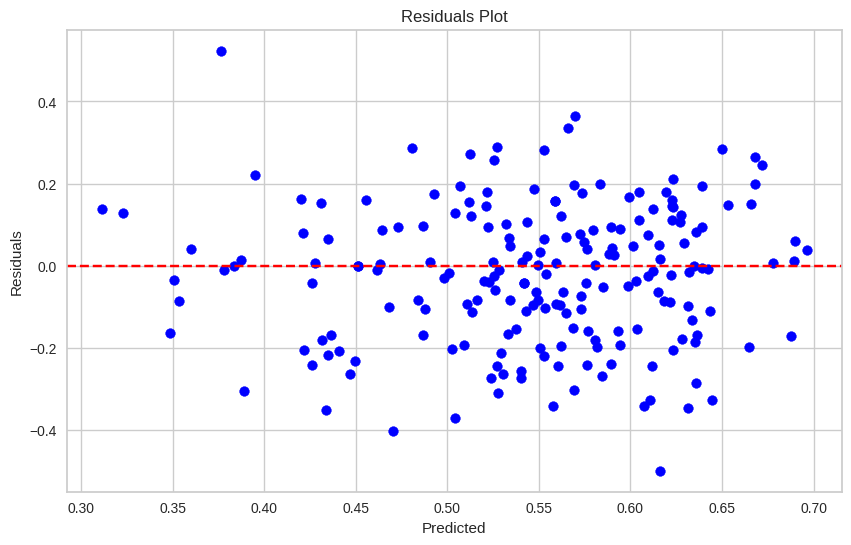

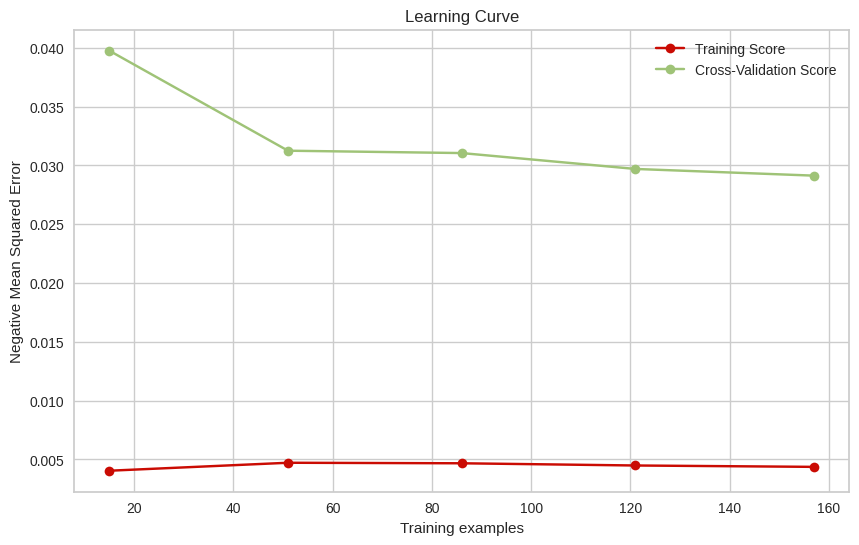

In [ ]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.show()

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

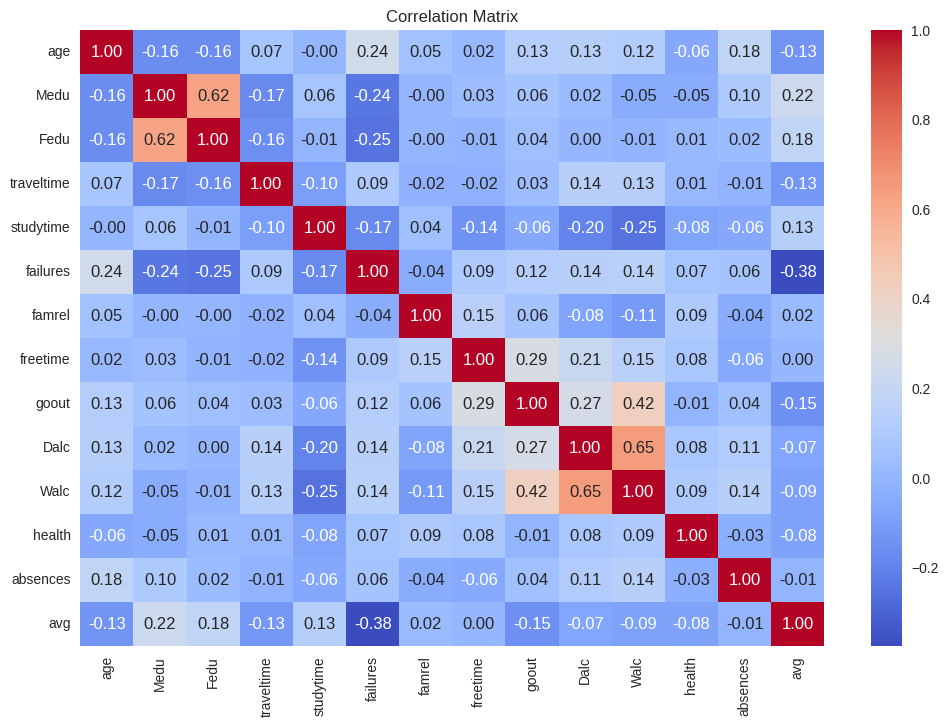

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
categorical=df.select_dtypes(exclude="object").columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, categorical)
    ])

data = preprocessor.fit_transform(df)

data = pd.DataFrame(data, columns=categorical)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0.283333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0.266667
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0.416667
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,0.733333
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0.433333


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, mae = nn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

Epoch 1/100
5/5 [==============================] - 1s 52ms/step - loss: 0.2620 - mae: 0.4114 - val_loss: 0.1767 - val_mae: 0.3247
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1459 - mae: 0.3112 - val_loss: 0.1298 - val_mae: 0.2697
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0984 - mae: 0.2583 - val_loss: 0.0906 - val_mae: 0.2358
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0578 - mae: 0.1948 - val_loss: 0.0964 - val_mae: 0.2479
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0501 - mae: 0.1793 - val_loss: 0.0873 - val_mae: 0.2360
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0371 - mae: 0.1558 - val_loss: 0.0699 - val_mae: 0.2018
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0308 - mae: 0.1453 - val_loss: 0.0660 - val_mae: 0.1951
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0256 - mae: 0.1306 - v

In [ ]:
nn.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0634 - mae: 0.2014


[0.06338376551866531, 0.2013920098543167]